# ======================================
# STEP 1 — Import Libraries
# ======================================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters



# ======================================
# STEP 2 — Load and Prepare the Data
# ======================================

In [3]:
df = pd.read_csv("passenger.csv")

# Rename columns for clarity
df.columns = ["Month", "Passengers"]

# Convert 'Month' column to datetime
df["Month"] = pd.to_datetime(df["Month"])

# Set as index for time series analysis
df.set_index("Month", inplace=True)

print("✅ Data Loaded Successfully!")
df.head()

✅ Data Loaded Successfully!


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# ======================================
# STEP 3 — Visualize the Time Series
# ======================================

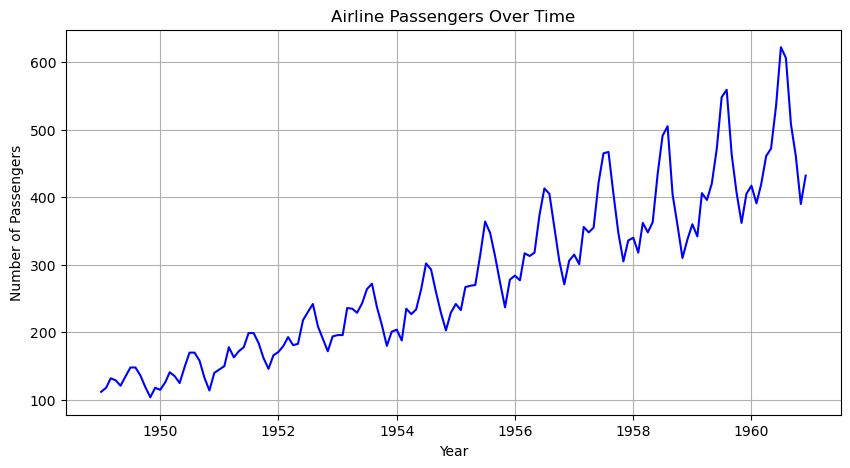

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], color="blue")
plt.title("Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

# ======================================
# STEP 5 — ARIMA Forecasting
# ======================================

In [6]:
# (p, d, q) = (1, 1, 1) is a simple configuration
model = ARIMA(df["Passengers"], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print("\n🧩 ARIMA Model Summary:")
print(model_fit.summary())

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)


🧩 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 02 Nov 2025   AIC                           1394.683
Time:                        12:55:54   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107

c:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# ======================================
# STEP 6 — Plot Forecast
# ======================================

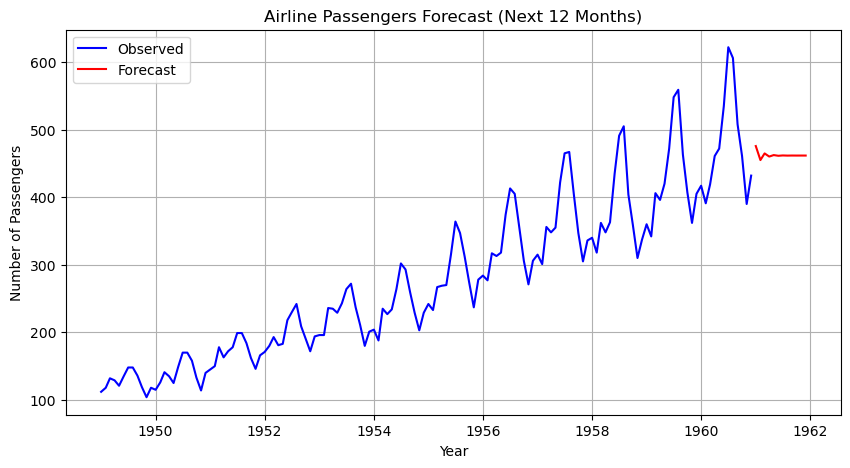


✅ Forecast Complete!


In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], label="Observed", color="blue")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.title("Airline Passengers Forecast (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

print("\n✅ Forecast Complete!")